<a href="https://colab.research.google.com/github/rrstats/doge/blob/main/DOGE_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from datascience import*
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import pandas as pd
import datetime as datetime

In [84]:
doge = Table().read_table('DOGE-USD.csv')
doge

Date,Open,High,Low,Close,Adj Close,Volume
2021-04-27,0.271427,0.279629,0.264928,0.272188,0.272188,3590611310
2021-04-28,0.272273,0.344662,0.256231,0.323682,0.323682,14464343767
2021-04-29,0.323232,0.323881,0.296904,0.305169,0.305169,5027354503
2021-04-30,0.304702,0.339757,0.302981,0.337561,0.337561,5290390982
2021-05-01,0.337559,0.397135,0.32829,0.392987,0.392987,10123343703
2021-05-02,0.391087,0.400029,0.364874,0.376046,0.376046,8040406918
2021-05-03,0.373631,0.445567,0.373631,0.441707,0.441707,10526649978
2021-05-04,0.440274,0.605998,0.4008,0.541334,0.541334,38238126181
2021-05-05,0.537355,0.695262,0.523822,0.657633,0.657633,42525098292
2021-05-06,0.652842,0.663616,0.545102,0.580804,0.580804,18989900291


In [85]:
weekdays = make_array('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')

In [86]:
def day(date):
  dt = date
  year, month, day = (int(x) for x in dt.split('-'))
  weekday_name = datetime.date(year, month, day)
  return weekday_name.strftime('%A')
 

In [87]:
doge = doge.with_columns('Day', doge.apply(day, 'Date'))
doge

Date,Open,High,Low,Close,Adj Close,Volume,Day
2021-04-27,0.271427,0.279629,0.264928,0.272188,0.272188,3590611310,Tuesday
2021-04-28,0.272273,0.344662,0.256231,0.323682,0.323682,14464343767,Wednesday
2021-04-29,0.323232,0.323881,0.296904,0.305169,0.305169,5027354503,Thursday
2021-04-30,0.304702,0.339757,0.302981,0.337561,0.337561,5290390982,Friday
2021-05-01,0.337559,0.397135,0.32829,0.392987,0.392987,10123343703,Saturday
2021-05-02,0.391087,0.400029,0.364874,0.376046,0.376046,8040406918,Sunday
2021-05-03,0.373631,0.445567,0.373631,0.441707,0.441707,10526649978,Monday
2021-05-04,0.440274,0.605998,0.4008,0.541334,0.541334,38238126181,Tuesday
2021-05-05,0.537355,0.695262,0.523822,0.657633,0.657633,42525098292,Wednesday
2021-05-06,0.652842,0.663616,0.545102,0.580804,0.580804,18989900291,Thursday


In [88]:
vol = doge.select('Date', 'Volume', 'Day')
vol

Date,Volume,Day
2021-04-27,3590611310,Tuesday
2021-04-28,14464343767,Wednesday
2021-04-29,5027354503,Thursday
2021-04-30,5290390982,Friday
2021-05-01,10123343703,Saturday
2021-05-02,8040406918,Sunday
2021-05-03,10526649978,Monday
2021-05-04,38238126181,Tuesday
2021-05-05,42525098292,Wednesday
2021-05-06,18989900291,Thursday


In [89]:
def weekday_total(tab1):
  tots=[]
  weekdays = make_array('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')

  for i in weekdays:
    volume = tab1.where('Day', are.containing(i)).column('Volume')
    #print(volume)
    tots.append(np.sum(volume))
  return tots


In [90]:
weekday_total(vol)

[145385689898,
 138922718113,
 170053925149,
 186506744985,
 155756598156,
 150749821779,
 121591599455]

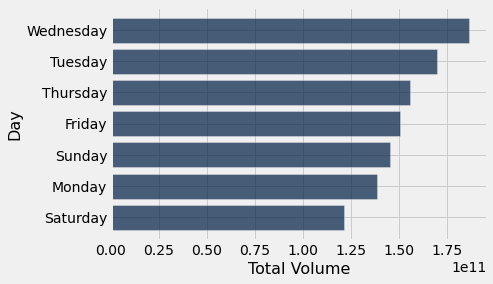

In [91]:
vol_tab = Table().with_columns('Day', weekdays,
                               'Total Volume', weekday_total(vol))
vol_tab.sort('Total Volume', descending=True).barh('Day')

In [92]:
def weekday_median_volume(tab1):
  medians=[]
  for i in weekdays:
    volume = tab1.where('Day', are.containing(i)).column('Volume')
    #print(volume)
    medians.append(np.median(volume))
  return medians


In [93]:
weekday_median_volume(vol)

[1260336793.0,
 1681399646.0,
 1766963639.0,
 1543405154.0,
 1629111897.5,
 1561453016.0,
 1181198332.0]

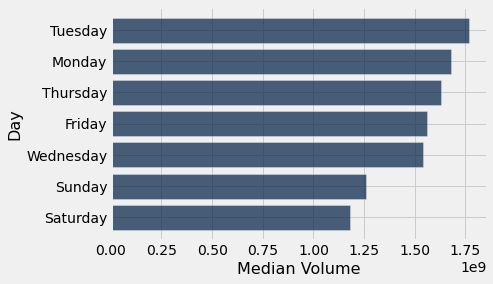

In [94]:
vol_tab = vol_tab.with_columns('Median Volume', weekday_median_volume(vol))
vol_tab.select('Median Volume', 'Day').sort('Median Volume', descending=True).barh('Day')

In [95]:
def weekday_mean_volume(tab1):
  means=[]
  for i in weekdays:
    volume = tab1.where('Day', are.containing(i)).column('Volume')
    #print(volume)
    means.append(np.mean(volume))
  return means


In [96]:
weekday_mean_volume(vol)

[2795878651.8846154,
 2671590732.9423075,
 3208564625.4528303,
 3518995188.3962264,
 2995319195.3076925,
 2899035034.2115383,
 2338299989.519231]

In [97]:
vol_table = Table().with_columns('Day', weekdays,
                                 'Total Volume', weekday_total(vol),
                                 'Mean Volume', weekday_mean_volume(vol),
                                 'Median Volume', weekday_median_volume(vol))
vol_table

Day,Total Volume,Mean Volume,Median Volume
Sunday,145385689898,2.79588e+09,1.26034e+09
Monday,138922718113,2.67159e+09,1.6814e+09
Tuesday,170053925149,3.20856e+09,1.76696e+09
Wednesday,186506744985,3.519e+09,1.54341e+09
Thursday,155756598156,2.99532e+09,1.62911e+09
Friday,150749821779,2.89904e+09,1.56145e+09
Saturday,121591599455,2.3383e+09,1.1812e+09


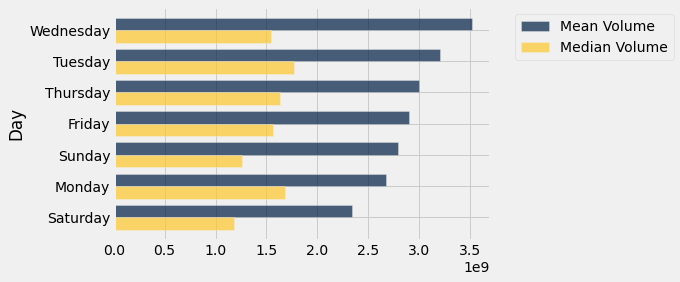

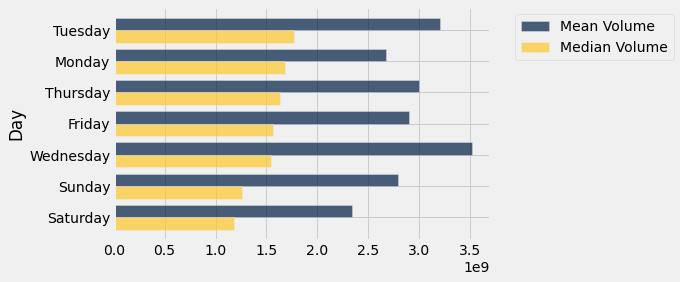

In [98]:
vol_table.drop('Total Volume').sort('Mean Volume', descending=True).barh('Day'),
vol_table.drop('Total Volume').sort('Median Volume', descending=True).barh('Day')

## END OF VOLUME ANALYSIS

## PRICE ANALYSIS: ONE DAY AT A TIME


In [99]:
#Prices only for Monday & Tuesday
prices = doge.select('Open', 'High', 'Close', 'Day', 'Date')
p_mon_tue = prices.where('Day', are.not_containing('Wedn')).where(
    'Day', are.not_containing('Thur')).where(
        'Day', are.not_containing('Fri')).where(
            'Day', are.not_containing('Sat')).where(
                'Day', are.not_containing('Sund'))
p_mon_tue

Open,High,Close,Day,Date
0.271427,0.279629,0.272188,Tuesday,2021-04-27
0.373631,0.445567,0.441707,Monday,2021-05-03
0.440274,0.605998,0.541334,Tuesday,2021-05-04
0.569687,0.569687,0.449964,Monday,2021-05-10
0.450488,0.546651,0.495231,Tuesday,2021-05-11
0.513413,0.515221,0.487892,Monday,2021-05-17
0.486954,0.515599,0.476115,Tuesday,2021-05-18
0.306715,0.371485,0.366162,Monday,2021-05-24
0.366041,0.38001,0.346302,Tuesday,2021-05-25
0.301949,0.329163,0.32581,Monday,2021-05-31


In [100]:
p_mon = p_mon_tue.where('Day', are.containing('Mon'))
p_mon


Open,High,Close,Day,Date
0.373631,0.445567,0.441707,Monday,2021-05-03
0.569687,0.569687,0.449964,Monday,2021-05-10
0.513413,0.515221,0.487892,Monday,2021-05-17
0.306715,0.371485,0.366162,Monday,2021-05-24
0.301949,0.329163,0.32581,Monday,2021-05-31
0.371566,0.379678,0.33105,Monday,2021-06-07
0.323903,0.336927,0.332085,Monday,2021-06-14
0.28066,0.280889,0.178691,Monday,2021-06-21
0.264918,0.266982,0.256857,Monday,2021-06-28
0.246419,0.246419,0.231614,Monday,2021-07-05


In [101]:
def week_line(tab2):
  weekdays = make_array('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')

  for i in weekdays:
    wk = tab2.where('Day', are.containing(i))
    wk.plot('Date', 'Open')

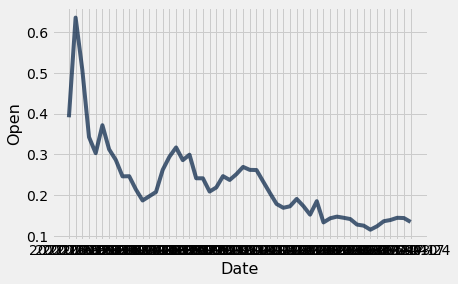

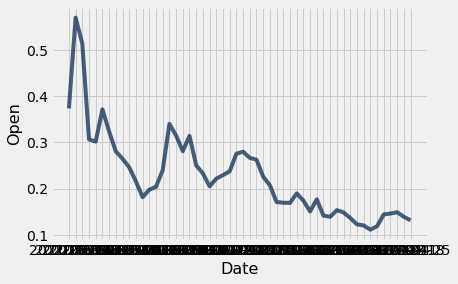

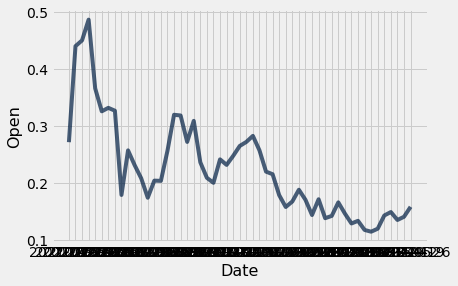

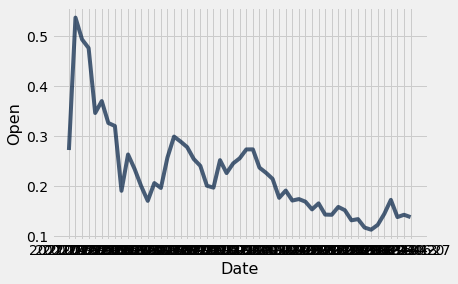

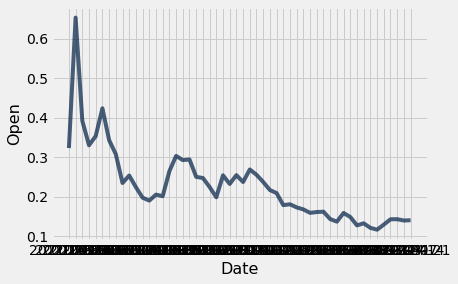

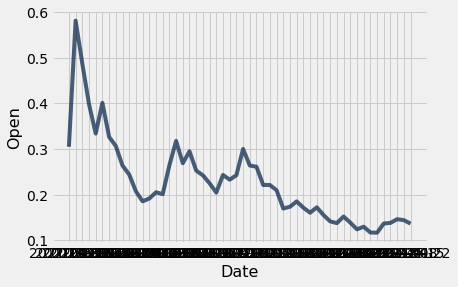

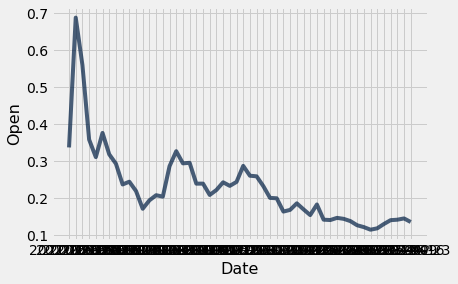

In [102]:
week_line(prices)

In [103]:
# Creating dummy DataFrame for testing
df = pd.DataFrame({ 'a': [1, 2, 3, 4, 5, 6],
                    'b': [8, 18, 27, 20, 33, 49],
                    'c': [2, 24, 6, 16, 20, 52]})
# Printing DataFrame before applying diff function
print(df)
  
# Printing DataFrame after applying diff function
print("Difference: ")
print(df.diff(periods=2))

   a   b   c
0  1   8   2
1  2  18  24
2  3  27   6
3  4  20  16
4  5  33  20
5  6  49  52
Difference: 
     a     b     c
0  NaN   NaN   NaN
1  NaN   NaN   NaN
2  2.0  19.0   4.0
3  2.0   2.0  -8.0
4  2.0   6.0  14.0
5  2.0  29.0  36.0


In [104]:
tue = prices.where('Day', are.not_containing('Wedn')).where(
    'Day', are.not_containing('Thur')).where(
        'Day', are.not_containing('Fri')).where(
            'Day', are.not_containing('Sat')).where(
                'Day', are.not_containing('Sund')).where(
                    'Day', are.not_containing('Mon')) 
tue

Open,High,Close,Day,Date
0.271427,0.279629,0.272188,Tuesday,2021-04-27
0.440274,0.605998,0.541334,Tuesday,2021-05-04
0.450488,0.546651,0.495231,Tuesday,2021-05-11
0.486954,0.515599,0.476115,Tuesday,2021-05-18
0.366041,0.38001,0.346302,Tuesday,2021-05-25
0.325744,0.383079,0.370077,Tuesday,2021-06-01
0.331822,0.341435,0.327687,Tuesday,2021-06-08
0.326785,0.330495,0.328381,Tuesday,2021-06-15
0.178682,0.216122,0.191031,Tuesday,2021-06-22
0.257061,0.27494,0.262769,Tuesday,2021-06-29


In [105]:
# Importing Pandas Library
import pandas as pd 
  
# Creating dummy DataFrame for testing
df = pd.DataFrame({ 'Open': tue.column('Open'),
                    'High': tue.column('High'),
                    'Close': tue.column('Close'),
                    'Day': tue.column('Day'),
                    'Date': tue.column('Date')})

# Printing DataFrame before applying diff function
print(df)
  
# Printing DataFrame after applying diff function
#print("Difference: ")
#print(df.diff())

        Open      High     Close      Day        Date
0   0.271427  0.279629  0.272188  Tuesday  2021-04-27
1   0.440274  0.605998  0.541334  Tuesday  2021-05-04
2   0.450488  0.546651  0.495231  Tuesday  2021-05-11
3   0.486954  0.515599  0.476115  Tuesday  2021-05-18
4   0.366041  0.380010  0.346302  Tuesday  2021-05-25
5   0.325744  0.383079  0.370077  Tuesday  2021-06-01
6   0.331822  0.341435  0.327687  Tuesday  2021-06-08
7   0.326785  0.330495  0.328381  Tuesday  2021-06-15
8   0.178682  0.216122  0.191031  Tuesday  2021-06-22
9   0.257061  0.274940  0.262769  Tuesday  2021-06-29
10  0.231216  0.241910  0.234422  Tuesday  2021-07-06
11  0.208009  0.208062  0.200003  Tuesday  2021-07-13
12  0.173763  0.178895  0.170801  Tuesday  2021-07-20
13  0.203836  0.209293  0.205899  Tuesday  2021-07-27
14  0.203431  0.205077  0.195967  Tuesday  2021-08-03
15  0.256366  0.262791  0.257325  Tuesday  2021-08-10
16  0.319631  0.339462  0.299442  Tuesday  2021-08-17
17  0.318386  0.319757  0.28

In [106]:
dftue = pd.DataFrame({ 'Open': tue.column('Open'),
                    'High': tue.column('High'),
                    'Close': tue.column('Close')})

In [107]:
def diff_day():

  dftue = pd.DataFrame({ 'Open':tue.column('Open'),
                    'High': tue.column('High'),
                    'Close': tue.column('Close'),
                    })

  #  Printing DataFrame before applying diff function
  print(dftue)
  
  # Printing DataFrame after applying diff function
  #print("Difference: ")


  #Used to subtract columns
  print(dftue.diff(axis=1))

In [108]:
dftue_diff = dftue.diff(axis=1)

#Column Difference

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bf03d6a10>]],
       dtype=object), Open          NaN
 High     0.006425
 Close   -0.008094
 dtype: float64)

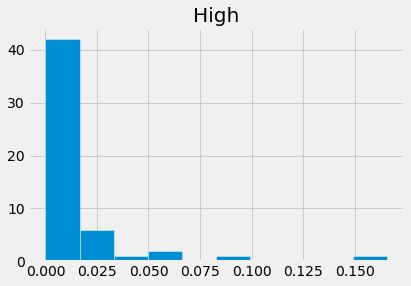

In [109]:
dftue_diff.hist('High'), dftue_diff.median()

In [110]:
mon = p_mon
mon

Open,High,Close,Day,Date
0.373631,0.445567,0.441707,Monday,2021-05-03
0.569687,0.569687,0.449964,Monday,2021-05-10
0.513413,0.515221,0.487892,Monday,2021-05-17
0.306715,0.371485,0.366162,Monday,2021-05-24
0.301949,0.329163,0.32581,Monday,2021-05-31
0.371566,0.379678,0.33105,Monday,2021-06-07
0.323903,0.336927,0.332085,Monday,2021-06-14
0.28066,0.280889,0.178691,Monday,2021-06-21
0.264918,0.266982,0.256857,Monday,2021-06-28
0.246419,0.246419,0.231614,Monday,2021-07-05


In [111]:
dfmon = pd.DataFrame({ 'Open': mon.column('Open'),
                    'High': mon.column('High'),
                    'Close': mon.column('Close')})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bf2c24a50>]],
      dtype=object)

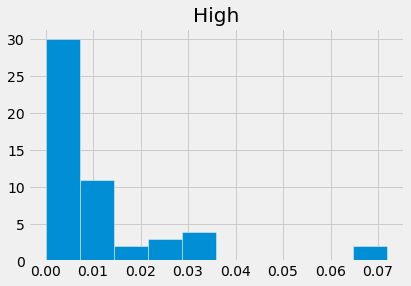

In [112]:
dfmon.diff(axis=1).hist('High')

In [113]:
wed = prices.where('Day', are.containing('Wed'))
wed

Open,High,Close,Day,Date
0.272273,0.344662,0.323682,Wednesday,2021-04-28
0.537355,0.695262,0.657633,Wednesday,2021-05-05
0.493742,0.519975,0.385376,Wednesday,2021-05-12
0.476435,0.684735,0.333123,Wednesday,2021-05-19
0.346396,0.36592,0.353693,Wednesday,2021-05-26
0.370302,0.44459,0.423374,Wednesday,2021-06-02
0.326423,0.353762,0.343331,Wednesday,2021-06-09
0.320378,0.321393,0.307761,Wednesday,2021-06-16
0.190671,0.24711,0.232174,Wednesday,2021-06-23
0.263417,0.263538,0.254215,Wednesday,2021-06-30


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bf29e45d0>]],
      dtype=object)

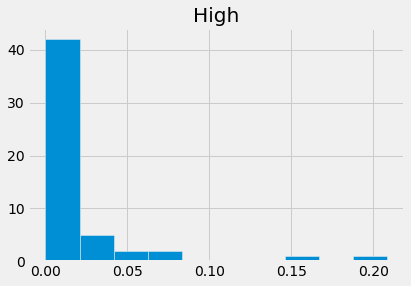

In [118]:
dfwed = pd.DataFrame({ 'Open': wed.column('Open'),
                    'High': wed.column('High'),
                    'Close': wed.column('Close')})
#dfwed
dfwed.diff(axis=1).hist('High')